# 네이버 영화 평점 변화 확인하기

In [13]:
from bs4 import BeautifulSoup  
import requests
import pandas as pd

url = "https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20210923"
headers = { 'User-Agent' : ('Mozilla/5.0 (Windows NT 10.0;Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'), } 

page = requests.get(url, headers=headers)
soup = BeautifulSoup(page.text, "html.parser")
movie_name = [x.find('a').get_text() for x in soup.find_all('div', 'tit5')]
movie_point = [x.get_text() for x in soup.find_all('td', 'point')]
print(movie_name, movie_point)

['원더', '코다', '해리 포터와 마법사의 돌', '기적', '해피 투게더', '킹 오브 프리즘', '꽃다발 같은 사랑을 했다', '킹 오브 프리즘 프라이드 더 히어로', '여름날 우리', '윤희에게', '이별의 아침에 약속의 꽃을 장식하자', '중경삼림', '리틀 포레스트', '너의 이름은.', '부에나 비스타 소셜 클럽', '화양연화', '마미', '캡틴 판타스틱', '보이스', '분노', '블랙 위도우', '노매드랜드', '아비정전', '로렌스 애니웨이 ', '링', '레토', '너의 췌장을 먹고 싶어', '모가디슈', '메기', '우리의 20세기', '릴리 슈슈의 모든 것', '하나와 앨리스', '맨 인 더 다크 2 ', '날씨의 아이', '그린 나이트', '호우시절', '인질', '말리그넌트', '더 수어사이드 스쿼드', '싱크홀', '샹치와 텐 링즈의 전설', '쏘아올린 불꽃, 밑에서 볼까? 옆에서 볼까?', '귀문', '킹 오브 프리즘 -샤이니 세븐 스타즈-'] ['9.53', '9.37', '9.35', '9.26', '9.19', '9.18', '9.12', '9.11', '8.99', '8.96', '8.92', '8.91', '8.83', '8.80', '8.78', '8.77', '8.68', '8.59', '8.56', '8.55', '8.47', '8.47', '8.47', '8.45', '8.44', '8.43', '8.39', '8.35', '8.29', '8.25', '8.12', '8.10', '7.98', '7.96', '7.50', '7.40', '7.35', '7.21', '7.08', '6.61', '6.60', '6.51', '4.39', '2.15']


In [11]:
date = pd.date_range('2021-6-16', periods=100, freq='D').strftime('%Y%m%d')
date

Index(['20210616', '20210617', '20210618', '20210619', '20210620', '20210621',
       '20210622', '20210623', '20210624', '20210625', '20210626', '20210627',
       '20210628', '20210629', '20210630', '20210701', '20210702', '20210703',
       '20210704', '20210705', '20210706', '20210707', '20210708', '20210709',
       '20210710', '20210711', '20210712', '20210713', '20210714', '20210715',
       '20210716', '20210717', '20210718', '20210719', '20210720', '20210721',
       '20210722', '20210723', '20210724', '20210725', '20210726', '20210727',
       '20210728', '20210729', '20210730', '20210731', '20210801', '20210802',
       '20210803', '20210804', '20210805', '20210806', '20210807', '20210808',
       '20210809', '20210810', '20210811', '20210812', '20210813', '20210814',
       '20210815', '20210816', '20210817', '20210818', '20210819', '20210820',
       '20210821', '20210822', '20210823', '20210824', '20210825', '20210826',
       '20210827', '20210828', '20210829', '20210830

In [23]:
from tqdm import notebook

movie_date = []
movie_name = []
movie_point = []

for d in notebook.tqdm(date):
    url = f"http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={d}"
    html = requests.get(url, headers=headers)
    soup = BeautifulSoup(html.text, "html.parser")
    
    end = len(soup.find_all('td', 'point'))

    movie_date.extend([pd.Timestamp(d) for _ in range(end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(end)])

  0%|          | 0/100 [00:00<?, ?it/s]

In [24]:
movie = pd.DataFrame({'date':movie_date, 'name':movie_name, 'point':movie_point})
movie.head()

,date,name,point
0,2021-06-16,덕구,9.43
1,2021-06-16,크루엘라,9.33
2,2021-06-16,부활: 그 증거,9.30
3,2021-06-16,극장판 귀멸의 칼날: 무한열차편,9.29
4,2021-06-16,해피 투게더,9.19


In [25]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4510 entries, 0 to 4509
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4510 non-null   datetime64[ns]
 1   name    4510 non-null   object        
 2   point   4510 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 105.8+ KB


In [26]:
movie['point'] = movie['point'].astype(float)

movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4510 entries, 0 to 4509
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4510 non-null   datetime64[ns]
 1   name    4510 non-null   object        
 2   point   4510 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 105.8+ KB


In [27]:
movie_unique = pd.pivot_table(movie, index=['name'])
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best.head()

,point
name,
가버나움,9.590000
원더,9.530000
덕구,9.430000
코다,9.372353
해리 포터와 마법사의 돌,9.349000


In [39]:
# print(list(movie_best.index))
tmp = movie.query('name == ["크루엘라"]')
tmp

['가버나움', '원더', '덕구', '코다', '해리 포터와 마법사의 돌', '피아니스트', '모던 타임즈', '언더독', '자산어보', '소울', '부활: 그 증거', '극장판 귀멸의 칼날: 무한열차편', '인생', '우리들', '기적', '크루엘라', '위대한 독재자', '페이트 스테이 나이트 헤븐즈필 제3장 스프링 송', '보스 베이비 2', '해피 투게더', '킹 오브 프리즘', '바울', '프리 가이', '혐오스런 마츠코의 일생', '우드잡', '킹 오브 프리즘 프라이드 더 히어로', '꽃다발 같은 사랑을 했다', '루카', '바그다드 카페 : 디렉터스컷', '타오르는 여인의 초상', '비긴 어게인', '굿바이', '크루즈 패밀리: 뉴 에이지', '서칭 포 슈가맨', '빅 피쉬', '여름날 우리', '번지 점프를 하다', '흐르는 강물처럼', '윤희에게', '이보다 더 좋을 순 없다', '남매의 여름밤', '러브 액츄얼리', '신세계', '기쿠지로의 여름', '명탐정 코난: 비색의 탄환', '더 파더', '중경삼림', '배심원들', '이별의 아침에 약속의 꽃을 장식하자', '잔칫날', 'U-571', '천로역정: 천국을 찾아서', '김복동', '리틀 포레스트', '너의 이름은.', '소공녀', '부에나 비스타 소셜 클럽', '화양연화', '찬실이는 복도 많지', '벌새', '13 구역', '마미', '그을린 사랑', '보스 베이비', '플로리다 프로젝트', '69세', '걸어도 걸어도', '프란츠', '와니와 준하', '퐁네프의 연인들', '세자매', '캡틴 판타스틱', '피아노', '드림걸즈', '분노', '너와 파도를 탈 수 있다면', '블랙 위도우', '블루 재스민', '노매드랜드', '아비정전', '정글 크루즈', '로렌스 애니웨이 ', '링', '500일의 썸머', '레토', '보이스', '영웅: 천하의 시작', '티파니에서 아침을', '러브 라이브! 선샤인!! 더 스쿨 아이돌 무비 오버 더 레인보우', '초속5센티미터', '인 더 하이츠'

,date,name,point
1,2021-06-16,크루엘라,9.33
51,2021-06-17,크루엘라,9.32
101,2021-06-18,크루엘라,9.32
151,2021-06-19,크루엘라,9.31
201,2021-06-20,크루엘라,9.31
...,...,...,...
3506,2021-09-03,크루엘라,9.23
3556,2021-09-04,크루엘라,9.23
3605,2021-09-05,크루엘라,9.23
3656,2021-09-06,크루엘라,9.23


No handles with labels found to put in legend.


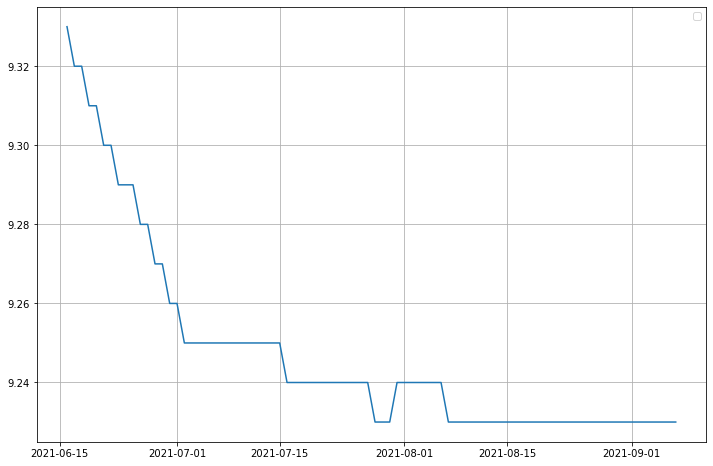

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()

In [46]:
movie_best.head(10)

,point
name,
가버나움,9.590000
원더,9.530000
덕구,9.430000
코다,9.372353
해리 포터와 마법사의 돌,9.349000
피아니스트,9.330000
모던 타임즈,9.320000
언더독,9.320000
자산어보,9.320000


# 영화별 날짜 변화에 따른 평점 변화 확인하기

In [42]:
movie_pivot = pd.pivot_table(movie, index=["date"], columns=['name'], 
                                         values=['point'])
movie_pivot.head()

point                                                         ...  \
name       13 구역 47 미터 500일의 썸머 69세 U-571 가버나움 간츠: 오  강변호텔 걸어도 걸어도 괴기맨숀  ...   
date                                                                     ...   
2021-06-16   NaN   NaN     8.43 NaN   NaN  NaN   8.2   NaN     NaN  NaN  ...   
2021-06-17   NaN   NaN     8.43 NaN   NaN  NaN   8.2   NaN     NaN  NaN  ...   
2021-06-18   NaN   NaN     8.43 NaN   NaN  NaN   8.2   NaN     NaN  NaN  ...   
2021-06-19   NaN   NaN     8.43 NaN   NaN  NaN   8.2  5.98     NaN  NaN  ...   
2021-06-20   NaN   NaN     8.43 NaN   NaN  NaN   8.2  5.98     NaN  NaN  ...   

                                                                         \
name       하나와 앨리스 하하하 한여름의 판타지아 해리 포터와 마법사의 돌 해피 투게더 혐오스런 마츠코의 일생 호우시절   
date                                                                      
2021-06-16     NaN NaN       NaN           NaN   9.19          NaN  NaN   
2021-06-17     NaN NaN       NaN           NaN   9.19          NaN  NaN   
2021-06-18     NaN NaN       NaN           NaN   9.19          NaN  NaN   
2021-06-19     NaN NaN       NaN           NaN   9.19          NaN  NaN   
2021-06-20     NaN NaN       NaN           NaN   9.19          NaN  NaN   

                                  
name       홀리 모터스  화양연화 흐르는 강물처럼  
date                              
2021-06-16    NaN  8.77      NaN  
2021-06-17    NaN  8.77      NaN  
2021-06-18    NaN  8.77      NaN  
2021-06-19    NaN  8.77      NaN  
2021-06-20    NaN  8.77      NaN  

[5 rows x 181 columns]

In [43]:
movie_pivot.columns = movie_pivot.columns.droplevel()
movie_pivot.head()

name,13 구역,47 미터,500일의 썸머,69세,U-571,가버나움,간츠: 오,강변호텔,걸어도 걸어도,괴기맨숀,...,하나와 앨리스,하하하,한여름의 판타지아,해리 포터와 마법사의 돌,해피 투게더,혐오스런 마츠코의 일생,호우시절,홀리 모터스,화양연화,흐르는 강물처럼
date,,,,,,,,,,,,,,,,,,,,,
2021-06-16,NaN,NaN,8.43,NaN,NaN,NaN,8.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9.19,NaN,NaN,NaN,8.77,NaN
2021-06-17,NaN,NaN,8.43,NaN,NaN,NaN,8.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9.19,NaN,NaN,NaN,8.77,NaN
2021-06-18,NaN,NaN,8.43,NaN,NaN,NaN,8.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9.19,NaN,NaN,NaN,8.77,NaN
2021-06-19,NaN,NaN,8.43,NaN,NaN,NaN,8.2,5.98,NaN,NaN,...,NaN,NaN,NaN,NaN,9.19,NaN,NaN,NaN,8.77,NaN
2021-06-20,NaN,NaN,8.43,NaN,NaN,NaN,8.2,5.98,NaN,NaN,...,NaN,NaN,NaN,NaN,9.19,NaN,NaN,NaN,8.77,NaN


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

sns.set_style("darkgrid")
rc('font', family='AppleGothic')

%matplotlib inline

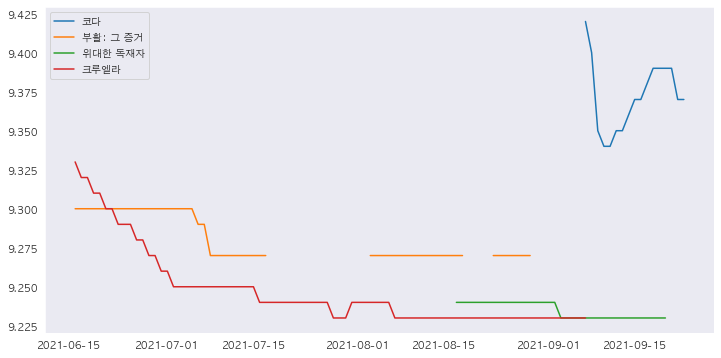

In [49]:
target_col = ['코다', '부활: 그 증거', '위대한 독재자', '크루엘라']
plt.figure(figsize=(12,6))
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc='best')
plt.grid()
plt.show()